In [ ]:
corpus = [
    ["movie", "had", "great", "story"],
    ["film", "had", "poor", "acting"],
    ["director", "created", "amazing", "movie"],
    ["acting", "ruined", "the", "story"],
    ["audience", "loved", "the", "film"]
]

In [ ]:
import numpy as np

# -----------------------------
# 0. Input corpus & parameters
# -----------------------------


corpus = [
    ["movie", "had", "great", "story"],
    ["film", "had", "poor", "acting"],
    ["director", "created", "amazing", "movie"],
    ["acting", "ruined", "the", "story"],
    ["audience", "loved", "the", "film"],
    ["plot", "was", "very", "engaging"],
    ["cinematography", "looked", "absolutely", "beautiful"],
    ["soundtrack", "was", "quite", "forgettable"],
    ["actors", "gave", "strong", "performance"],
    ["script", "felt", "weak", "and", "predictable"],
    ["film", "had", "excellent", "visual", "effects"],
    ["movie", "story", "was", "boring"],
    ["direction", "was", "top", "notch"],
    ["editing", "could", "have", "been", "better"],
    ["dialogues", "were", "powerful"],
    ["film", "lacked", "emotional", "depth"],
    ["movie", "was", "fun", "to", "watch"],
    ["plot", "twist", "was", "unexpected"],
    ["acting", "felt", "natural"],
    ["characters", "were", "poorly", "written"],
    ["movie", "had", "fantastic", "ending"],
    ["film", "started", "slow"],
    ["director", "handled", "story", "well"],
    ["background", "music", "was", "nice"],
    ["movie", "was", "too", "long"],
    ["film", "kept", "audience", "engaged"],
    ["acting", "was", "average"],
    ["story", "was", "heartwarming"],
    ["movie", "failed", "to", "impress"],
    ["film", "had", "good", "pace"],
    ["visuals", "were", "stunning"],
    ["screenplay", "needed", "improvement"],
    ["movie", "was", "inspiring"],
    ["acting", "seemed", "forced"],
    ["film", "had", "memorable", "scenes"],
    ["director", "experimented", "with", "style"],
    ["story", "felt", "repetitive"],
    ["movie", "was", "highly", "entertaining"],
    ["film", "lacked", "originality"],
    ["actors", "did", "excellent", "job"],
    ["movie", "plot", "was", "confusing"],
    ["film", "delivered", "strong", "message"],
    ["acting", "was", "outstanding"],
    ["movie", "had", "predictable", "ending"],
    ["film", "cinematography", "was", "brilliant"],
    ["story", "was", "emotionally", "powerful"],
    ["movie", "failed", "box", "office"],
    ["film", "received", "positive", "reviews"],
    ["actors", "shared", "great", "chemistry"],
    ["movie", "was", "critically", "acclaimed"]
]

window_size = 1
embedding_dim = 3
learning_rate = 0.1
epochs = 2




Using Skipgram

In [ ]:
# -----------------------------
# 1. Build vocabulary
# -----------------------------
vocab = sorted(set(word for sentence in corpus for word in sentence))
print(f"vocab ===={vocab}" )
print("---------------------------------------------------------------------------------------------------")
word_to_index = {word: i for i, word in enumerate(vocab)}
print(f"word to index  ===={word_to_index }" )
print("---------------------------------------------------------------------------------------------------")
index_to_word = {i: word for word, i in word_to_index.items()}
print(f"index to word ===={index_to_word}" )
print("---------------------------------------------------------------------------------------------------")
vocab_size = len(vocab)
print(f"vocab size === {vocab_size}")
print("---------------------------------------------------------------------------------------------------")

vocab ====['absolutely', 'acclaimed', 'acting', 'actors', 'amazing', 'and', 'audience', 'average', 'background', 'beautiful', 'been', 'better', 'boring', 'box', 'brilliant', 'characters', 'chemistry', 'cinematography', 'confusing', 'could', 'created', 'critically', 'delivered', 'depth', 'dialogues', 'did', 'direction', 'director', 'editing', 'effects', 'emotional', 'emotionally', 'ending', 'engaged', 'engaging', 'entertaining', 'excellent', 'experimented', 'failed', 'fantastic', 'felt', 'film', 'forced', 'forgettable', 'fun', 'gave', 'good', 'great', 'had', 'handled', 'have', 'heartwarming', 'highly', 'impress', 'improvement', 'inspiring', 'job', 'kept', 'lacked', 'long', 'looked', 'loved', 'memorable', 'message', 'movie', 'music', 'natural', 'needed', 'nice', 'notch', 'office', 'originality', 'outstanding', 'pace', 'performance', 'plot', 'poor', 'poorly', 'positive', 'powerful', 'predictable', 'quite', 'received', 'repetitive', 'reviews', 'ruined', 'scenes', 'screenplay', 'script', 's

In [ ]:
# -----------------------------
# 2. Initialize word vectors
# -----------------------------
np.random.seed(42)
W_in = np.random.uniform(-0.5, 0.5, (vocab_size, embedding_dim))
print(f"W_in ===={W_in}" )
print("---------------------------------------------------------------------------------------------------")
W_out = np.random.uniform(-0.5, 0.5, (vocab_size, embedding_dim))
print(f"W_out ===={W_out}" )
print("---------------------------------------------------------------------------------------------------")

W_in ====[[-0.12545988  0.45071431  0.23199394]
 [ 0.09865848 -0.34398136 -0.34400548]
 [-0.44191639  0.36617615  0.10111501]
 [ 0.20807258 -0.47941551  0.46990985]
 [ 0.33244264 -0.28766089 -0.31817503]
 [-0.31659549 -0.19575776  0.02475643]
 [-0.06805498 -0.20877086  0.11185289]
 [-0.36050614 -0.20785535 -0.13363816]
 [-0.04393002  0.28517596 -0.30032622]
 [ 0.01423444  0.09241457 -0.45354959]
 [ 0.10754485 -0.32947588 -0.43494841]
 [ 0.44888554  0.46563203  0.30839735]
 [-0.19538623 -0.40232789  0.18423303]
 [-0.05984751 -0.37796177 -0.00482309]
 [-0.46561148  0.4093204  -0.24122002]
 [ 0.16252228 -0.18828892  0.02006802]
 [ 0.04671028 -0.31514554  0.46958463]
 [ 0.27513282  0.43949894  0.39482735]
 [ 0.09789998  0.42187424 -0.4115075 ]
 [-0.30401714 -0.45477271 -0.17466967]
 [-0.11132271 -0.22865097  0.32873751]
 [-0.14324667 -0.21906549  0.04269608]
 [-0.35907578  0.30219698 -0.42544936]
 [ 0.48688694  0.27224477 -0.30128432]
 [-0.49447788  0.31546143  0.20685734]
 [ 0.22900717  0

In [ ]:
# -----------------------------
# 3. Create training pairs
# -----------------------------
training_pairs = []

for sentence in corpus:
    for i, word in enumerate(sentence):
        target = word_to_index[word]
        for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
            if i != j:
                context = word_to_index[sentence[j]]
                training_pairs.append((target, context))

print(len(training_pairs))
print("training pairs ------------------------------------------------------------------------------")
print(training_pairs)


284
training pairs ------------------------------------------------------------------------------
[(64, 48), (48, 64), (48, 47), (47, 48), (47, 94), (94, 47), (41, 48), (48, 41), (48, 76), (76, 48), (76, 2), (2, 76), (27, 20), (20, 27), (20, 4), (4, 20), (4, 64), (64, 4), (2, 85), (85, 2), (85, 98), (98, 85), (98, 94), (94, 98), (6, 61), (61, 6), (61, 98), (98, 61), (98, 41), (41, 98), (75, 107), (107, 75), (107, 104), (104, 107), (104, 34), (34, 104), (17, 60), (60, 17), (60, 0), (0, 60), (0, 9), (9, 0), (92, 107), (107, 92), (107, 81), (81, 107), (81, 43), (43, 81), (3, 45), (45, 3), (45, 95), (95, 45), (95, 74), (74, 95), (88, 40), (40, 88), (40, 109), (109, 40), (109, 5), (5, 109), (5, 80), (80, 5), (41, 48), (48, 41), (48, 36), (36, 48), (36, 105), (105, 36), (105, 29), (29, 105), (64, 94), (94, 64), (94, 107), (107, 94), (107, 12), (12, 107), (26, 107), (107, 26), (107, 101), (101, 107), (101, 69), (69, 101), (28, 19), (19, 28), (19, 50), (50, 19), (50, 10), (10, 50), (10, 11), (

In [ ]:
# -----------------------------
# 4. Train using gradient descent
# -----------------------------
count = 0 ;
for epoch in range(epochs):
    for target, context in training_pairs:
        count = count + 1
        v_w = W_in[target]
        v_c = W_out[context]
        print(f"v_w ===={v_w}" )
        print(f"v_c ===={v_c}" )


        # Gradient (simplified)
        gradient = v_w - v_c
        print(f"gradient---> {gradient}")
        # Weight updates
        W_in[target]  -= learning_rate * gradient
        W_out[context] += learning_rate * gradient
        print(f"W_in[target] ===={W_in[target]}" )
        print(f"W_out[context] ===={W_out[context]}" )
        print("---------------------------------------------------------------------------------------------------")
print(f"count ---- > {count}")
print("next epoch --------------------------------------------------------------------------------------------------")

v_w ====[ 0.40041806  0.13310146 -0.16097021]
v_c ====[-0.45455362 -0.21903681  0.45041148]
gradient---> [ 0.85497168  0.35213827 -0.61138169]
W_in[target] ====[ 0.31492089  0.09788763 -0.09983204]
W_out[context] ====[-0.36905645 -0.18382298  0.38927331]
---------------------------------------------------------------------------------------------------
v_w ====[-0.21515951 -0.46311305  0.10956433]
v_c ====[0.26898742 0.44476573 0.34964739]
gradient---> [-0.48414692 -0.90787878 -0.24008306]
W_in[target] ====[-0.16674481 -0.37232517  0.13357264]
W_out[context] ====[0.22057272 0.35397785 0.32563909]
---------------------------------------------------------------------------------------------------
v_w ====[-0.16674481 -0.37232517  0.13357264]
v_c ====[0.12755808 0.08431431 0.40115801]
gradient---> [-0.29430289 -0.45663949 -0.26758537]
W_in[target] ====[-0.13731452 -0.32666123  0.16033118]
W_out[context] ====[0.09812779 0.03865036 0.37439947]
-----------------------------------------------

In [ ]:
# -----------------------------
# 5. Extract word embeddings
# -----------------------------
print("Final Word Embeddings:\n")
for word, idx in word_to_index.items():
    print(f"{word:10s} → {W_in[idx]}")

Final Word Embeddings:

absolutely → [-0.08998222  0.28991726  0.12715665]
acclaimed  → [ 0.14501465 -0.29668116 -0.35607801]
acting     → [-0.13426777  0.05602239  0.03347163]
actors     → [ 0.10940832 -0.24999615  0.35338515]
amazing    → [ 0.24975314 -0.10934524 -0.20702756]
and        → [-0.23814218 -0.19627358  0.08341184]
audience   → [ 0.07530133 -0.20777323 -0.04474972]
average    → [-0.31654153 -0.17857264 -0.10443604]
background → [-0.07757611  0.22622803 -0.31101853]
beautiful  → [-0.04165296  0.05613359 -0.37609889]
been       → [ 0.0056368  -0.21215486 -0.3830711 ]
better     → [0.3148387  0.40248455 0.17941929]
boring     → [-0.18318279 -0.34129778  0.14260328]
box        → [-0.08357126 -0.24422923  0.00815068]
brilliant  → [-0.38445152  0.35195862 -0.20129409]
characters → [ 0.16425334 -0.19031594 -0.00172572]
chemistry  → [ 0.05539695 -0.2530318   0.4410136 ]
cinematography → [0.18008557 0.28736045 0.25711954]
confusing  → [ 0.06865566  0.34589106 -0.34847159]
could    

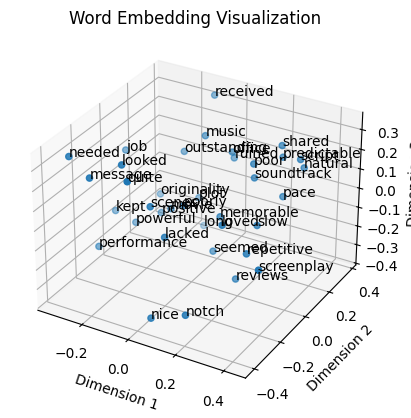

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paste your embeddings here as dictionary
embeddings = {
    "job": [-0.33579721, 0.08164337, 0.12308756],
    "kept": [-0.33910311, 0.00434144, -0.152231],
    "lacked": [0.04251154, -0.26958025, 0.006856],
    "long": [-0.13522929, 0.33384672, -0.35863605],
    "looked": [-0.12127343, -0.29146386, 0.3245851],
    "loved": [0.22989105, -0.17761179, 0.07912371],
    "memorable": [0.12701377, -0.00683132, -0.01623156],
    "message": [-0.20140801, -0.38232837, 0.28494654],
    "movie": [-0.10313696, 0.02441394, -0.07229387],
    "music": [-0.05063711, 0.19581518, 0.22585085],
    "natural": [0.34554907, 0.24289147, 0.16356019],
    "needed": [-0.3124522, -0.34455209, 0.33285856],
    "nice": [0.06460872, -0.40963195, -0.30965453],
    "notch": [0.19803913, -0.38958897, -0.25596876],
    "office": [0.07302401, 0.18334803, 0.18842464],
    "originality": [-0.25728209, 0.20539397, -0.15272778],
    "outstanding": [-0.15226806, 0.21185592, 0.10339034],
    "pace": [0.30385994, 0.15559017, 0.05272921],
    "performance": [-0.30483793, -0.17406426, -0.22287445],
    "plot": [-0.08824134, 0.21211107, -0.11935532],
    "poor": [0.21159556, 0.09453206, 0.22260279],
    "poorly": [-0.0123525, -0.0371761, 0.01013719],
    "positive": [-0.18884965, 0.09574236, -0.16495484],
    "powerful": [-0.245967898, 0.000125811592, -0.179698902],
    "predictable": [0.25643662, 0.24290828, 0.1888986],
    "quite": [-0.02932652, -0.40316477, 0.33661766],
    "received": [-0.1104383, 0.37385007, 0.32122959],
    "repetitive": [0.31715876, -0.15145195, -0.05025864],
    "reviews": [0.23109801, -0.07346891, -0.26093825],
    "ruined": [0.03717719, 0.26452169, 0.10177968],
    "scenes": [-0.01250771, -0.27654449, 0.14575481],
    "screenplay": [0.43205022, -0.27421352, -0.01333929],
    "script": [0.34696791, 0.20823759, 0.22590297],
    "seemed": [0.08825678, 0.00972722, -0.21920588],
    "shared": [0.26023312, 0.22625568, 0.258275],
    "slow": [0.286990143, -0.0150522466, 0.00020596975],
    "soundtrack": [0.20520607, 0.11359255, 0.13929314],
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = [], [], []

for word, vec in embeddings.items():
    xs.append(vec[0])
    ys.append(vec[1])
    zs.append(vec[2])
    ax.text(vec[0], vec[1], vec[2], word)

ax.scatter(xs, ys, zs)

ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")

plt.title("Word Embedding Visualization")
plt.show()


Using CBOW

will it undersatnd negation ??